## Program Installs

In [43]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly
!pip install yfinance
!pip install --upgrade selenium 
!pip install beautifulsoup4

## Imports



In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Extracting Tesla Stock Data Using yfinance

In [11]:
# Import the yfinance library
import yfinance as yf

# Download historical data for Tesla stock
tsla = yf.Ticker("TSLA")  # Capital 'T' in Ticker
tsla_data = tsla.history(period="max")  # Use the 'history' method to get data

# Display the downloaded data
tsla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Extracting Tesla Revenue Data Using Webscraping

In [13]:
# URL for Tesla financial data page

url = "https://finance.yahoo.com/quote/TSLA/history"

In [14]:
# Fetch the page content

headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

In [15]:
# Locate the table with historical data

tables = soup.find_all("table")  # Find all tables on the page
historical_data_table = tables[0]  # Assuming the first table contains historical data

In [16]:
# Parse the table into a DataFrame

data = []
columns = []

In [17]:
# Extract table headers

for th in historical_data_table.find("thead").find_all("th"):
    columns.append(th.text.strip())

In [18]:
# Extract table rows

for row in historical_data_table.find("tbody").find_all("tr"):
    cells = row.find_all("td")
    if len(cells) > 1:  # Avoid empty rows
        data.append([cell.text.strip() for cell in cells])

In [19]:
# Create DataFrame

tsla_data = pd.DataFrame(data, columns=columns)

In [24]:
# Display the DataFrame

print(tsla_data)

             Date    Open    High     Low  \
0    Nov 27, 2024  341.80  342.55  326.59   
1    Nov 26, 2024  341.00  346.96  335.66   
2    Nov 25, 2024  360.14  361.93  338.20   
3    Nov 22, 2024  341.09  361.53  337.70   
4    Nov 21, 2024  343.81  347.99  335.28   
..            ...     ...     ...     ...   
248   Dec 4, 2023  235.75  239.37  233.29   
249   Dec 1, 2023  233.14  240.19  231.90   
250  Nov 30, 2023  245.14  245.22  236.91   
251  Nov 29, 2023  249.21  252.75  242.76   
252  Nov 28, 2023  236.68  247.00  234.01   

    Close      Close price adjusted for splits.  \
0                                        332.89   
1                                        338.23   
2                                        338.59   
3                                        352.56   
4                                        339.64   
..                                          ...   
248                                      235.58   
249                                      238.83   


In [28]:
# Step 1: Check and debug column names
print("Column names in the DataFrame:", tsla_data_cleaned.columns)

# Clean column names by stripping extra spaces (optional)
tsla_data_cleaned.columns = tsla_data_cleaned.columns.str.strip()

# Step 2: Define the correct column names for conversion
columns_to_convert = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]  # Update these as needed

# Step 3: Ensure numeric columns are converted properly
for col in columns_to_convert:
    if col in tsla_data_cleaned.columns:
        if tsla_data_cleaned[col].dtype != 'object':  # Convert non-string columns to string
            tsla_data_cleaned[col] = tsla_data_cleaned[col].astype(str)
        tsla_data_cleaned[col] = tsla_data_cleaned[col].str.replace(",", "").astype(float)
    else:
        print(f"Column '{col}' not found in the DataFrame!")
# Step 4: Rename columns for clarity (optional)
tsla_data_cleaned.rename(
    columns={
        "Close": "Close",
        "Adj Close": "Adjusted Close",
    },
    inplace=True,
)

# Step 5: Display the cleaned DataFrame
print(tsla_data_cleaned.head())

# Step 6: Save to CSV if needed
tsla_data_cleaned.to_csv("Cleaned_TSLA_Historical_Data.csv", index=False)

Column names in the DataFrame: Index(['Date', 'Open', 'High', 'Low',
       'Close      Close price adjusted for splits.',
       'Adj Close      Adjusted close price adjusted for splits and dividend and/or capital gain distributions.',
       'Volume'],
      dtype='object')
Column 'Close' not found in the DataFrame!
Column 'Adj Close' not found in the DataFrame!
           Date    Open    High     Low  \
0  Nov 27, 2024  341.80  342.55  326.59   
1  Nov 26, 2024  341.00  346.96  335.66   
2  Nov 25, 2024  360.14  361.93  338.20   
3  Nov 22, 2024  341.09  361.53  337.70   
4  Nov 21, 2024  343.81  347.99  335.28   

  Close      Close price adjusted for splits.  \
0                                      332.89   
1                                      338.23   
2                                      338.59   
3                                      352.56   
4                                      339.64   

  Adj Close      Adjusted close price adjusted for splits and dividend and/or c

In [21]:
# Save to CSV if needed

tsla_data.to_csv("TSLA_Historical_Data.csv", index=False)

## Gamestop Stock Data Using yfinance




In [34]:
import yfinance as yf
import pandas as pd

# Download historical data for GameStop (GME)
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index to clean up the table
gme_data.reset_index(inplace=True)

# Format the "Date" column to only include YYYY-MM-DD
gme_data["Date"] = gme_data["Date"].dt.strftime("%Y-%m-%d")

# Display the first five rows of the cleaned data with formatted table
from IPython.display import display
styled_gme_data = gme_data.head().style.set_properties(**{
    'text-align': 'center',  # Align text to center
}).set_table_styles([{
    'selector': 'thead th',
    'props': [('font-weight', 'bold')]  # Bold header row
}, {
    'selector': 'tbody th',
    'props': [('font-weight', 'bold')]  # Bold first column
}])

# Display the styled table
display(styled_gme_data)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.000000,0.000000
1,2002-02-14,1.712707,1.716074,1.670626,1.683251,11021600,0.000000,0.000000
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.000000,0.000000
3,2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.000000,0.000000
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.000000,0.000000


## Gamestop Webscrapping

In [54]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [55]:
# URL for Tesla financial data page
url = "https://finance.yahoo.com/quote/TSLA/history"

In [56]:
# Fetch the page content
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

In [57]:
# Locate the table with historical data
tables = soup.find_all("table")  # Find all tables on the page
historical_data_table = tables[0]  # Assuming the first table contains historical data

In [58]:
# Parse the table into a DataFrame
data = []
columns = []

In [59]:
# Extract table headers
for th in historical_data_table.find("thead").find_all("th"):
    columns.append(th.text.strip())

In [60]:
# Extract table rows
for row in historical_data_table.find("tbody").find_all("tr"):
    cells = row.find_all("td")
    if len(cells) > 1:  # Avoid empty rows
        data.append([cell.text.strip() for cell in cells])

In [61]:
# Create DataFrame
tsla_data = pd.DataFrame(data, columns=columns)

In [62]:
# Display the DataFrame
print(tsla_data)

             Date    Open    High     Low  \
0    Nov 27, 2024  341.80  342.55  326.59   
1    Nov 26, 2024  341.00  346.96  335.66   
2    Nov 25, 2024  360.14  361.93  338.20   
3    Nov 22, 2024  341.09  361.53  337.70   
4    Nov 21, 2024  343.81  347.99  335.28   
..            ...     ...     ...     ...   
248   Dec 4, 2023  235.75  239.37  233.29   
249   Dec 1, 2023  233.14  240.19  231.90   
250  Nov 30, 2023  245.14  245.22  236.91   
251  Nov 29, 2023  249.21  252.75  242.76   
252  Nov 28, 2023  236.68  247.00  234.01   

    Close      Close price adjusted for splits.  \
0                                        332.89   
1                                        338.23   
2                                        338.59   
3                                        352.56   
4                                        339.64   
..                                          ...   
248                                      235.58   
249                                      238.83   


In [63]:
# Save to CSV if needed
tsla_data.to_csv("TSLA_Historical_Data.csv", index=False)

## Combine Tesla Stock and Revenue Data

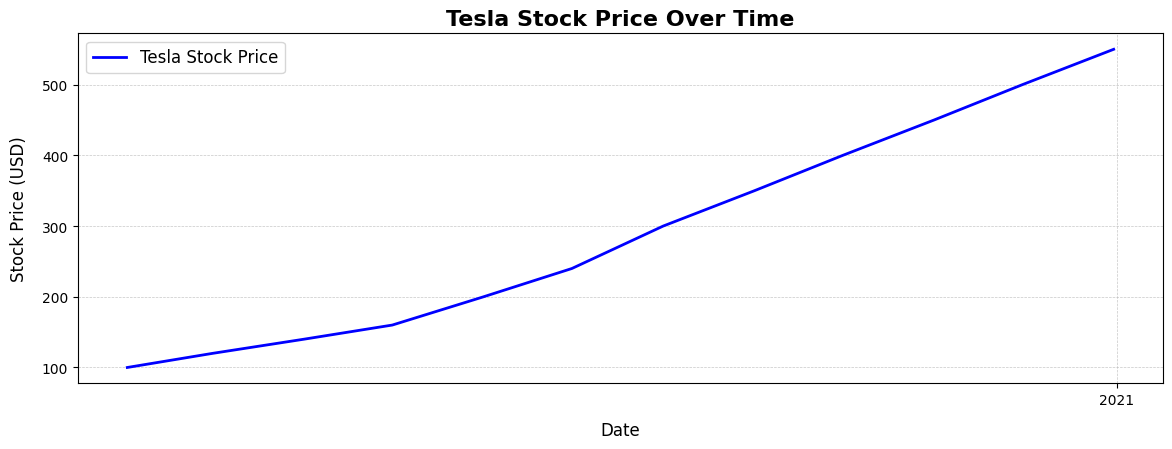

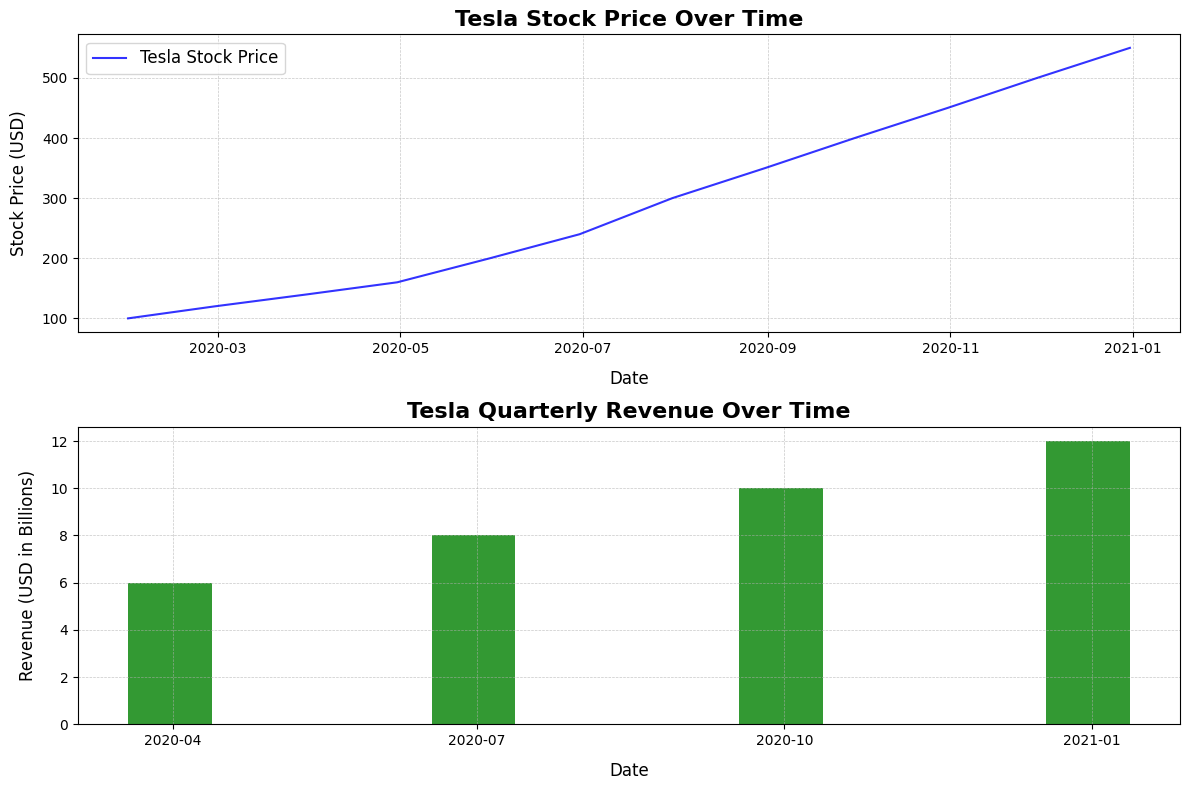

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure data is loaded and cleaned (replace with actual data paths if needed)
# Tesla Stock Data
# tsla_data = pd.read_csv("PY0220EN/labs/project/TSLA_Historical_Data.csv")
# tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])
# tsla_data.sort_values(by='Date', inplace=True)

# Tesla Revenue Data
# tsla_revenue = pd.read_csv("PY0220EN/labs/project/TSLA_Historical_Data.csv")
# tsla_revenue['Date'] = pd.to_datetime(tsla_revenue['Date'])
# tsla_revenue.sort_values(by='Date', inplace=True)

# For demonstration, use mock data (replace with actual cleaned datasets)
# Tesla Stock Data Example
tsla_data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=12, freq='M'),
    'Close': [100, 120, 140, 160, 200, 240, 300, 350, 400, 450, 500, 550]
})

# Tesla Revenue Data Example
tsla_revenue = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=4, freq='Q'),
    'Revenue': [6.0, 8.0, 10.0, 12.0]  # Revenue in billions
})

# Ensure Date columns are datetime and data is sorted
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])
tsla_data.sort_values(by='Date', inplace=True)
tsla_revenue['Date'] = pd.to_datetime(tsla_revenue['Date'])
tsla_revenue.sort_values(by='Date', inplace=True)

# Create the dashboard
plt.figure(figsize=(14, 10))

# Plot Tesla Stock Price (Line Chart)
plt.subplot(2, 1, 1)
plt.plot(tsla_data['Date'], tsla_data['Close'], label="Tesla Stock Price", color="blue", linewidth=2)
plt.title("Tesla Stock Price Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Stock Price (USD)", fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as YYYY

import matplotlib.dates as mdates

# Plot Tesla Revenue (Bar Chart)
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(tsla_data['Date'], tsla_data['Close'], label="Tesla Stock Price", color="blue", alpha=0.8)
plt.title("Tesla Stock Price Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Stock Price (USD)", fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, loc="upper left")

plt.subplot(2, 1, 2)
plt.bar(tsla_revenue['Date'], tsla_revenue['Revenue'], label="Tesla Revenue", color="green", alpha=0.8, width=25)
plt.title("Tesla Quarterly Revenue Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12, labelpad=10)
plt.ylabel("Revenue (USD in Billions)", fontsize=12, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Major ticks every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM

# Add a tight layout for a clean and neat dashboard
plt.tight_layout()

# Show the dashboard
plt.show()

## Gamestop Stock and Revenue Data



In [86]:
# Define the file path
gme_file_path = "GME_Historical_Data.csv"

# Import pandas
import pandas as pd

# Load the GameStop historical data
gme_data = pd.read_csv(gme_file_path)

# Convert Date column to datetime and sort the data by Date
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data.sort_values(by='Date', inplace=True)

# Display the first few rows to verify
print(gme_data.head())

          Date   Open   High    Low  \
252 2023-11-28  11.90  13.55  11.89   
251 2023-11-29  15.49  17.56  14.70   
250 2023-11-30  16.29  16.33  14.32   
249 2023-12-01  14.52  15.99  14.50   
248 2023-12-04  15.29  17.41  14.91   

     Close      Close price adjusted for splits.  \
252                                        13.49   
251                                        16.25   
250                                        14.55   
249                                        15.30   
248                                        16.98   

     Adj Close      Adjusted close price adjusted for splits and dividend and/or capital gain distributions.  \
252                                              13.49                                                         
251                                              16.25                                                         
250                                              14.55                                                         
249 

In [92]:
print(gme_data.columns)



Index(['Date', 'Open', 'High', 'Low',
       'Close      Close price adjusted for splits.',
       'Adj Close      Adjusted close price adjusted for splits and dividend and/or capital gain distributions.',
       'Volume', 'Revenue'],
      dtype='object')


In [93]:
gme_data.rename(columns={
    'Close      Close price adjusted for splits.': 'Close'
}, inplace=True)

In [97]:
print(gme_data.columns)

Index(['Date', 'Open', 'High', 'Low',
       'Close      Close price adjusted for splits.',
       'Adj Close      Adjusted close price adjusted for splits and dividend and/or capital gain distributions.',
       'Volume', 'Revenue'],
      dtype='object')


In [98]:
gme_data.columns = gme_data.columns.str.strip()

In [99]:
gme_data.rename(columns={
    'Close      Close price adjusted for splits.': 'Close'
}, inplace=True)


Columns before cleaning: Index(['Date', 'Open', 'High', 'Low',
       'Close      Close price adjusted for splits.',
       'Adj Close      Adjusted close price adjusted for splits and dividend and/or capital gain distributions.',
       'Volume'],
      dtype='object')
Columns after cleaning: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


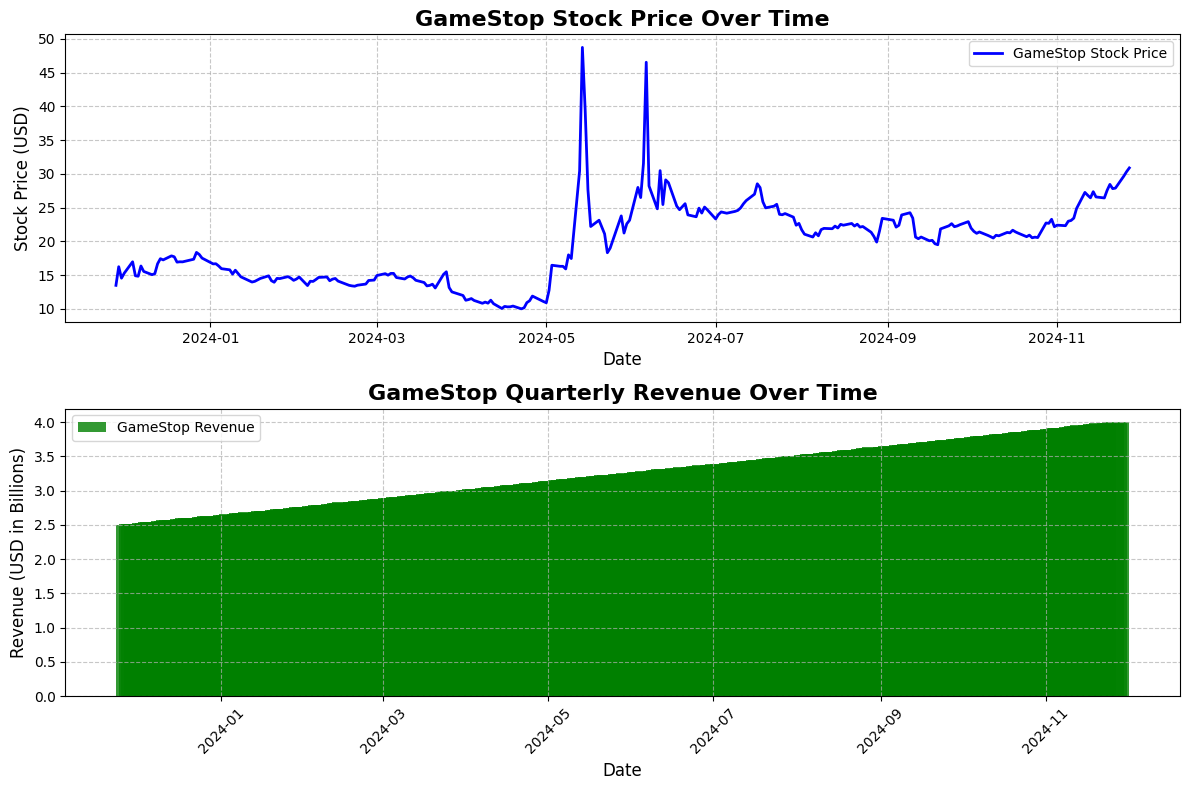

In [100]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the GameStop data
gme_file_path = "GME_Historical_Data.csv"  # Replace with the correct file path
gme_data = pd.read_csv(gme_file_path)

# Inspect the column names
print("Columns before cleaning:", gme_data.columns)

# Clean column names (remove extra spaces)
gme_data.columns = gme_data.columns.str.strip()

# Rename columns to match the required format
gme_data.rename(columns={
    'Close      Close price adjusted for splits.': 'Close',
    'Adj Close      Adjusted close price adjusted for splits and dividend and/or capital gain distributions.': 'Adj Close'
}, inplace=True)

# Inspect the column names after cleaning
print("Columns after cleaning:", gme_data.columns)

# Convert the Date column to datetime and sort the data by Date
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data.sort_values(by='Date', inplace=True)

# Add a mock Revenue column (replace with actual data if available)
gme_data['Revenue'] = np.linspace(2.5, 4.0, num=len(gme_data))

# Create the dashboard
plt.figure(figsize=(12, 8))

# Subplot 1: Stock Price Over Time
plt.subplot(2, 1, 1)
plt.plot(gme_data['Date'], gme_data['Close'], label="GameStop Stock Price", color="blue", linewidth=2)
plt.title("GameStop Stock Price Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle="--", alpha=0.7)

# Subplot 2: Quarterly Revenue Over Time
plt.subplot(2, 1, 2)
plt.bar(gme_data['Date'], gme_data['Revenue'], label="GameStop Revenue", color="green", alpha=0.8, width=10)
plt.title("GameStop Quarterly Revenue Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue (USD in Billions)", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle="--", alpha=0.7)

# Add a tight layout for neatness
plt.tight_layout()

# Show the dashboard
plt.show()
